<a href="https://colab.research.google.com/github/elixirutkarsh/ResNet_Classification/blob/main/ResNet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
782/782 [==============================] - 257s 322ms/step - loss: 2.0516 - accuracy: 0.2476 - val_loss: 1.9335 - val_accuracy: 0.2821
Epoch 2/10
782/782 [==============================] - 255s 326ms/step - loss: 1.8829 - accuracy: 0.3165 - val_loss: 1.8406 - val_accuracy: 0.3397
Epoch 3/10
782/782 [==============================] - 253s 323ms/step - loss: 1.8209 - accuracy: 0.3418 - val_loss: 1.8501 - val_accuracy: 0.3320
Epoch 4/10
782/782 [==============================] - 252s 322ms/step - loss: 1.7891 - accuracy: 0.3544 - val_loss: 1.8189 - val_accuracy: 0.3564
Epoch 5/10
782/782 [==============================] - 256s 328ms/step - loss: 1.7607 - accuracy: 0.3651 - val_loss: 1.7433 - val_accuracy: 0.3665
Epoch 6/10
782/782 [==============================] - 251s 321ms/step - loss: 1.7414 - accuracy: 0.3747 - val_loss: 1.7383 - val_accuracy: 0.3736
Epoch 7/10
782/782 [==============================] - 251s 

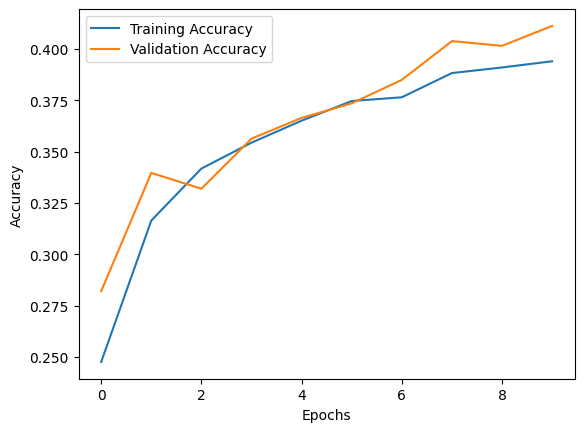

1/1 [==============================] - 1s 1s/step


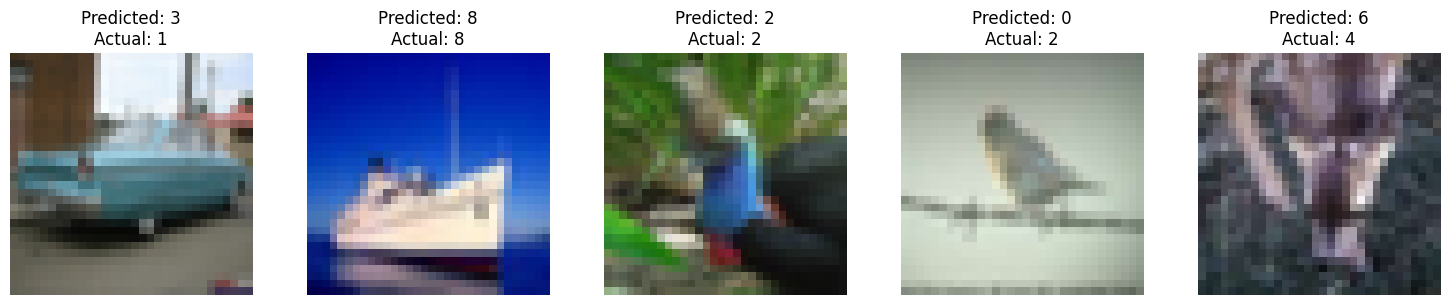

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load the pre-trained ResNet50 model (excluding the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(256, activation='relu')(x)

# Add the final classification layer
predictions = Dense(10, activation='softmax')(x)

# Create the ResNet model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained ResNet model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Select a few random test images for visualization
num_samples = 5
random_indices = np.random.randint(0, x_test.shape[0], size=num_samples)
sample_images = x_test[random_indices]
sample_labels = np.argmax(y_test[random_indices], axis=1)

# Generate predictions for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize the sample images along with their predicted classes
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
for i in range(num_samples):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f"Predicted: {predicted_labels[i]}\nActual: {sample_labels[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()
